# Визуализация данных на карте

[Источник](https://opensourc.es/blog/covid-19)

[Репка со статами](https://github.com/CSSEGISandData/COVID-19)

In [ ]:
using Pkg
pkgs = ["Plots", "CSV", "DataFrames", "Shapefile", "Luxor", "ColorSchemes"]

for p in pkgs
    Pkg.add(p)
end

In [1]:
cd(s"C:\Users\User\Desktop\Mycop")

In [47]:
download("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv", "covid.csv")

"covid.csv"

In [2]:
using DataFrames, CSV

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1273
┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1273


In [3]:
function summarize_data()
    df = CSV.read("covid.csv"; copycols=true)
    select!(df, Not(Symbol("Province/State")))
    select!(df, Not(:Lat))
    select!(df, Not(:Long))
    rename!(df, Symbol("Country/Region") => :Country)
    
    for row in eachrow(df)
        if row[:Country] == "Hong Kong"
            row[:Country] = "Mainland China"
        end
    end
    
    df
end

df1 = summarize_data()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20
,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,Afghanistan,0,0,0,0,0,0,0
2,Albania,0,0,0,0,0,0,0
3,Algeria,0,0,0,0,0,0,0
4,Andorra,0,0,0,0,0,0,0
5,Angola,0,0,0,0,0,0,0
6,Antigua and Barbuda,0,0,0,0,0,0,0
7,Argentina,0,0,0,0,0,0,0
8,Armenia,0,0,0,0,0,0,0
9,Australia,0,0,0,0,0,0,0


In [52]:
names(df1)[end]

Symbol("4/7/20")

In [53]:
findfirst(x-> x == "Russia", df1[!, 1] )

188

In [54]:
df1[188, :]

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20
,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
188,Russia,0,0,0,0,0,0,0,0


In [4]:
using Dates

In [5]:
datezstr = [ "$el" for el in names(df1)[2:end] ] # из символов в строки

dformat = Dates.DateFormat("mm/dd/yy")

datez =  Dates.Date.(datezstr, dformat) .+ Dates.Year(2000) # в формат дат для графиков

77-element Array{Date,1}:
 2020-01-22
 2020-01-23
 2020-01-24
 2020-01-25
 2020-01-26
 2020-01-27
 2020-01-28
 2020-01-29
 2020-01-30
 2020-01-31
 2020-02-01
 2020-02-02
 2020-02-03
 ⋮         
 2020-03-27
 2020-03-28
 2020-03-29
 2020-03-30
 2020-03-31
 2020-04-01
 2020-04-02
 2020-04-03
 2020-04-04
 2020-04-05
 2020-04-06
 2020-04-07

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273


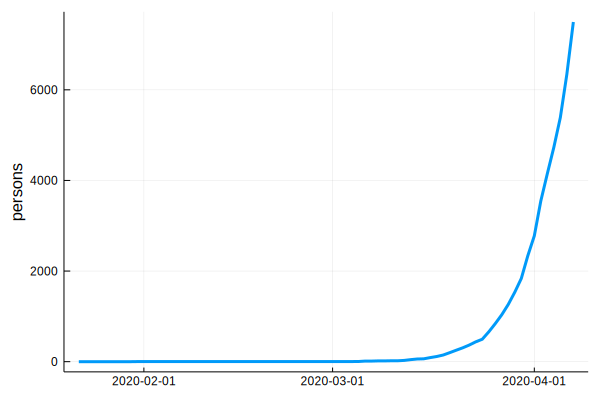

In [6]:
using Plots
confd = Vector(df1[188, :])[2:end]
plot(datez, confd, legend = false, line = 3, yaxis = "persons")

In [14]:
for row in eachrow(df1)
    if row[:Country] == "Hong Kong"
        row[:Country] = "Mainland China"
    end
end

adf = aggregate(df1, :Country, sum) # объединили регионы в страны

,Country,1/22/20_sum,1/23/20_sum,1/24/20_sum,1/25/20_sum,1/26/20_sum
,String,Int64,Int64,Int64,Int64,Int64
1,Afghanistan,0,0,0,0,0
2,Albania,0,0,0,0,0
3,Algeria,0,0,0,0,0
4,Andorra,0,0,0,0,0
5,Angola,0,0,0,0,0
6,Antigua and Barbuda,0,0,0,0,0
7,Argentina,0,0,0,0,0
8,Armenia,0,0,0,0,0
9,Australia,0,0,0,0,4


In [31]:
rename!(adf, Symbol.( ["Country"; datez] ) )

for row in eachrow(adf)
    if row[:Country] == "Mainland China"
        row[:Country] = "China"
    elseif row[:Country] == "US"
        row[:Country] = "United States"
    elseif row[:Country] == "UK"
        row[:Country] = "United Kingdom"
    end
end
CSV.write("summarized.csv", adf)

"summarized.csv"

# Рисуем карту

данные для границ качаем тута https://hub.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1/data
нужно закинуть в рабочую директорию .csv и .shp

In [32]:
using Shapefile, Luxor
using ColorSchemes

include(joinpath(dirname(pathof(Luxor)), "readshapefiles.jl"))

┌ Info: Precompiling Luxor [ae8d54c2-7ccd-5906-9d76-62fc9837b5bc]
└ @ Base loading.jl:1273


In [51]:
function draw_corona_map(outputfilename, countryoutlines, countries, corona_data, date)
    Drawing(768, 432, outputfilename) # размер картинки
    background("darkblue")
    origin()
    scale(2.5, 2.5) # масштаб карты

    setcolor("white")
    for country in countries
        pgons, bbox = convert(Array{Luxor.Point, 1}, countryoutlines.shapes[country.second])
        for pgon in pgons
            poly(pgon, :fill)
        end
    end

    for row in eachrow(corona_data)
        country = row[:Country]
        cases = row[date]
        if haskey(countries, country)
            id = countries[country]
            color = get(reverse(colorschemes[:hot]), log10(cases), (0.0, 5.5))
            setcolor((color.r,color.g,color.b))
            pgons, bbox = convert(Array{Luxor.Point, 1}, countryoutlines.shapes[id])
            for pgon in pgons
                poly(pgon, :fill)
            end
        end
    end
    
    finish()
end

draw_corona_map (generic function with 1 method)

In [140]:
worldshapefile = "Countries_WGS84.shp"
countries = CSV.read("Countries_WGS84.csv")
corona_data = CSV.read("summarized.csv")
countries_dict = Dict{String, Int}()
for row in eachrow(countries)
    countries_dict[row[:CNTRY_NAME]] = row[:OBJECTID]
end

worldshapes = open(worldshapefile) do f
    read(f, Shapefile.Handle)
end;

In [53]:
date = Symbol("2020-01-22")
draw_corona_map("corona-map.png", worldshapes, countries_dict, corona_data, date)
# в рабочей директории появилось картинко

true

насоздовываем кучу картинок для анимации

In [141]:
start_date = Date(2020,1,22)
dates = Vector{Symbol}(undef, ncol(corona_data)-1)
for i=0:ncol(corona_data)-2
    new_date = start_date + Dates.Day(i)
    dates[i+1] = Symbol(Dates.format(new_date, "yyyy-mm-dd"))
end
t = 0
for date in dates
    fname_pad = lpad(t, 3, "0")
    draw_corona_map("images/corona-map-$fname_pad.png", worldshapes, countries_dict, corona_data, date)
    t += 1
end

# Прогнозы (карикатура)

https://habr.com/ru/post/440618/

In [40]:
using Optim

┌ Info: Precompiling Optim [429524aa-4258-5aef-a3af-852621145aeb]
└ @ Base loading.jl:1273


In [65]:
F(p, x) = p[1]*exp(p[2]*x) 

model(p) = sum( [ (F(p, xdata[i]) - ydata[i])^2 for i = 1:length(xdata)] )

xdata = 0:length(datez)-1
ydata = confd

res = optimize(model, [0.01, 0.2])

 * Status: success

 * Candidate solution
    Minimizer: [1.35e-02, 1.74e-01]
    Minimum:   4.829564e+05

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [1.00e-02, 2.00e-01]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    78
    f(x) calls:    158


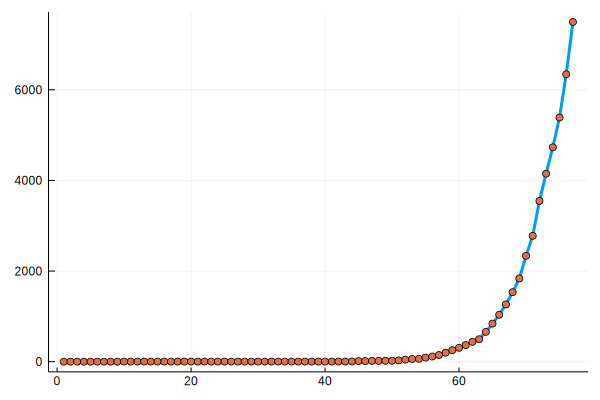

In [73]:
P = Optim.minimizer(res)
Y = [ F(P, x) for x in xdata];

plot(ydata, line = 3)
scatter!(confd, legend = false)

In [120]:
# Коэффициенты для каждой страны

A = zeros(size(adf, 1))
B = copy(A);

for i in 1:length(A)
    ydata = Vector(df1[i, :])[2:end] # данные по конкретной стране
    res = optimize(model, [0.01, 0.2])
    P = Optim.minimizer(res)
    A[i] = P[1]
    B[i] = P[2]
    print('.')
end

........................................................................................................................................................................................

In [121]:
M = [ F([A[i], B[i]], x) for i = 1:length(A), x = 1:150 ]; # 150 дней от появления нулевого пациента
size(M)

(184, 150)

In [138]:
datez2 = [datez[1] + Dates.Day(i) for i = 0:149 ]

dataz = DataFrame( M )

rename!(dataz, Symbol.( datez2 ) )

dataz = hcat(adf[!,1], dataz)

rename!(dataz, :x1 => :Country)

dataz[!,end]

184-element Array{Float64,1}:
      7.701479146881545e6 
 427901.2017536977        
      2.004955740578915e7 
      1.0261211952059015e6
 429190.0832286866        
 206574.6263145402        
      8.285995346608256e6 
      2.1719312925443584e6
 132537.20648561761       
      3.575954169641867e6 
 106146.48135803909       
 770796.4745891588        
 417308.2730095735        
      ⋮                   
      4.819767198103541e10
      2.5754296817203714e6
      2.6316269523846703e6
      1.811329517302328e6 
 945608.3186537485        
      1.8408302002015248e7
      1.8478072313441835e7
    737.3542315142364     
 299367.8262896169        
      1.1327588448049158e8
      6.467009233457769e7 
      4.875209236116815e7 

В некоторых странах количество заразившихся превышает население!
Невероятно!

In [139]:
CSV.write("summarized.csv", dataz)

"summarized.csv"